In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from dirs import PLAYER_DIR, EVENTS_DIR, MATCHES_DIR, RANKINGS_DIR

In [4]:
players_df = pd.read_csv(PLAYER_DIR)
events_df = pd.read_csv(EVENTS_DIR)
matches_df = pd.read_csv(MATCHES_DIR)
rankings_df = pd.read_csv(RANKINGS_DIR)

In [5]:
merged_one = pd.merge(players_df, matches_df, left_on='team_name', right_on='team_one_name')
merged_two = pd.merge(players_df, matches_df, left_on='team_name', right_on='team_two_name')
full_merged_df = pd.concat([merged_one, merged_two], ignore_index=True)

In [6]:
def determine_outcome(row):
    if row['team_name'] == row['team_one_name']:
        return 'win' if row['team_one_score'] > row['team_two_score'] else 'loss'
    else:
        return 'win' if row['team_two_score'] > row['team_one_score'] else 'loss'

full_merged_df['match_outcome'] = full_merged_df.apply(determine_outcome, axis=1)

c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

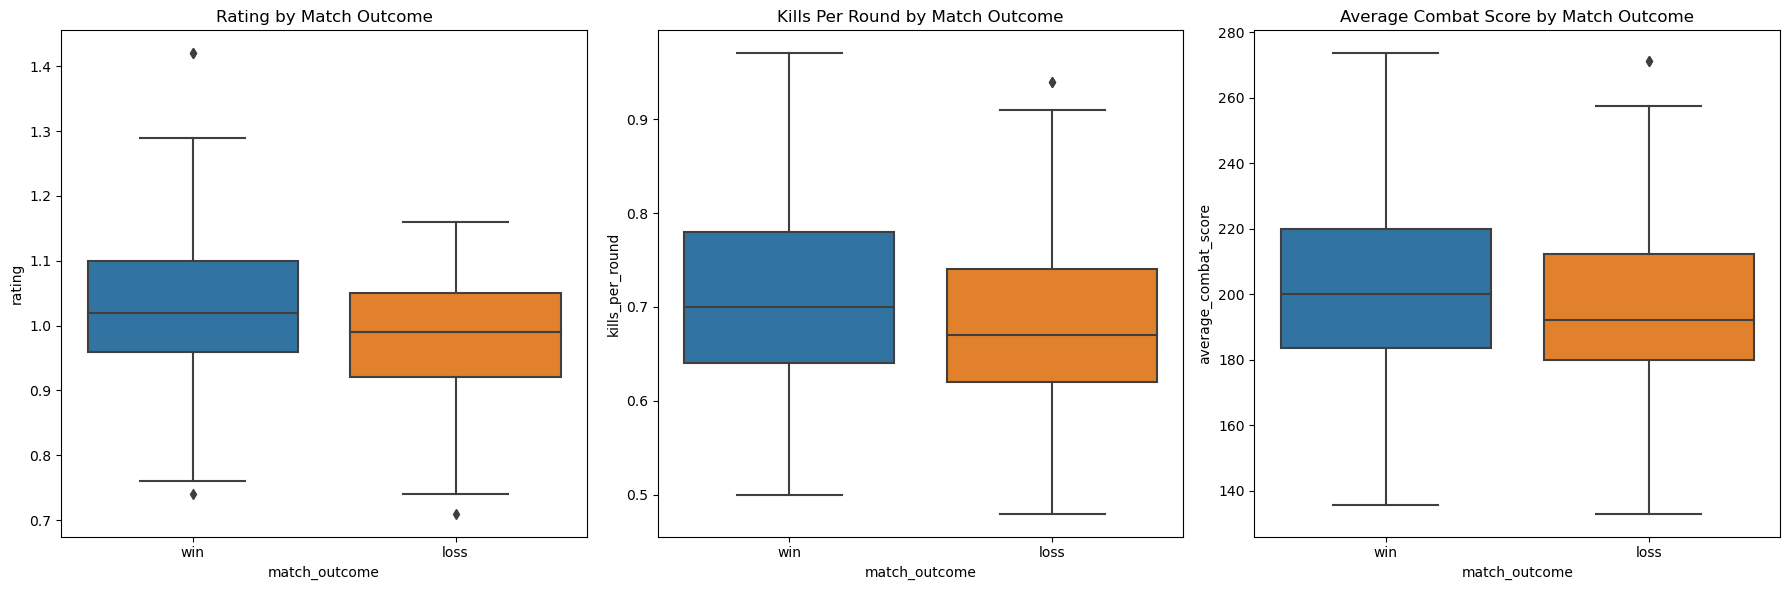

In [7]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='match_outcome', y='rating', data=full_merged_df)
plt.title('Rating by Match Outcome')

plt.subplot(1, 3, 2)
sns.boxplot(x='match_outcome', y='kills_per_round', data=full_merged_df)
plt.title('Kills Per Round by Match Outcome')

plt.subplot(1, 3, 3)
sns.boxplot(x='match_outcome', y='average_combat_score', data=full_merged_df)
plt.title('Average Combat Score by Match Outcome')
plt.tight_layout()
plt.show()

In [8]:
full_merged_df['outcome_binary'] = (full_merged_df['match_outcome'] == 'win').astype(int)
correlation_metrics = [
    'rating', 'average_combat_score', 'kills_per_round', 'assists_per_round', 
    'first_kills_per_round', 'first_deaths_per_round', 'headshot_percentage', 
    'clutch_success_percentage', 'outcome_binary'
]

correlation_matrix = full_merged_df[correlation_metrics].corr()
correlation_matrix

,rating,average_combat_score,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage,outcome_binary
rating,1.000000,0.681189,0.719803,0.053149,0.250320,-0.157289,0.239351,0.177066,0.230350
average_combat_score,0.681189,1.000000,0.975000,-0.344055,0.714469,0.388152,0.158848,0.123723,0.143565
kills_per_round,0.719803,0.975000,1.000000,-0.352810,0.658038,0.317342,0.235339,0.123004,0.163316
assists_per_round,0.053149,-0.344055,-0.352810,1.000000,-0.523169,-0.453759,-0.019313,0.033907,0.075329
first_kills_per_round,0.250320,0.714469,0.658038,-0.523169,1.000000,0.733989,0.019125,0.091407,0.048612
first_deaths_per_round,-0.157289,0.388152,0.317342,-0.453759,0.733989,1.000000,-0.141212,0.050596,-0.047987
headshot_percentage,0.239351,0.158848,0.235339,-0.019313,0.019125,-0.141212,1.000000,0.109720,0.102725
clutch_success_percentage,0.177066,0.123723,0.123004,0.033907,0.091407,0.050596,0.109720,1.000000,0.078176
outcome_binary,0.230350,0.143565,0.163316,0.075329,0.048612,-0.047987,0.102725,0.078176,1.000000


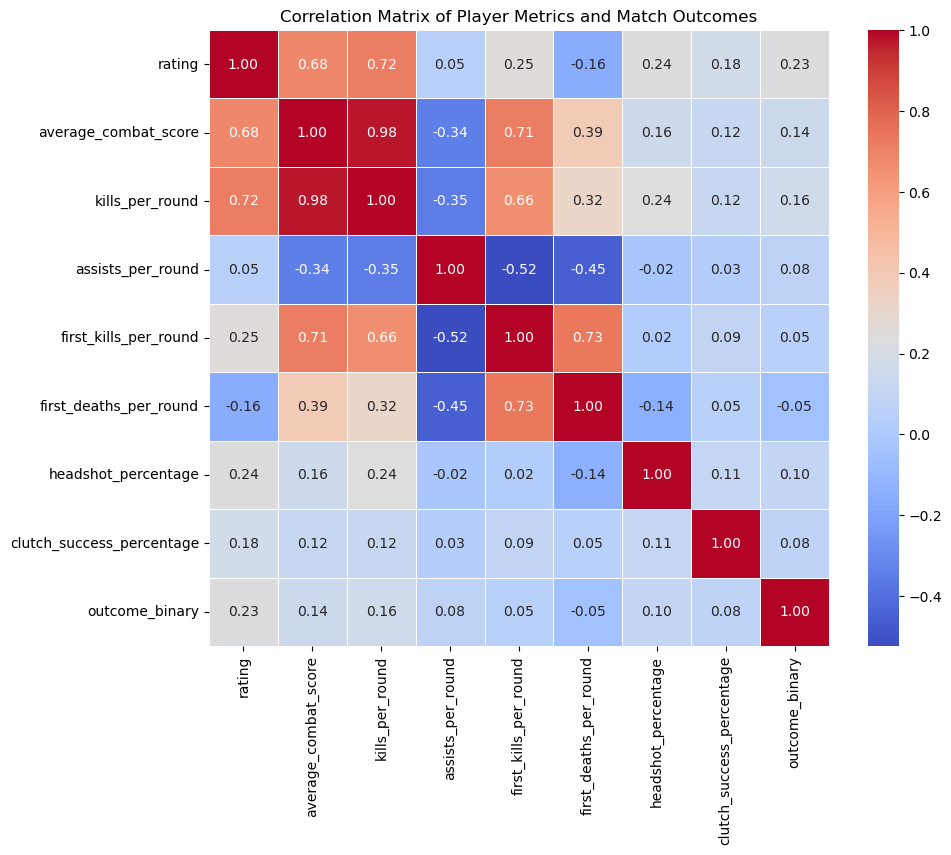

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Player Metrics and Match Outcomes')
plt.show()

In [10]:
from scipy.stats import pearsonr
correlation_stats = {}
for metric in correlation_metrics[:-1]:
    corr_coeff, p_value = pearsonr(full_merged_df[metric].dropna(), full_merged_df['outcome_binary'].dropna())
    correlation_stats[metric] = {'Correlation Coefficient': corr_coeff, 'p-value': p_value}
correlation_stats_df = pd.DataFrame(correlation_stats).T
correlation_stats_df

,Correlation Coefficient,p-value
rating,0.230350,0.000018
average_combat_score,0.143565,0.008020
kills_per_round,0.163316,0.002523
assists_per_round,0.075329,0.165794
first_kills_per_round,0.048612,0.371538
first_deaths_per_round,-0.047987,0.377730
headshot_percentage,0.102725,0.058467
clutch_success_percentage,0.078176,0.150325


c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


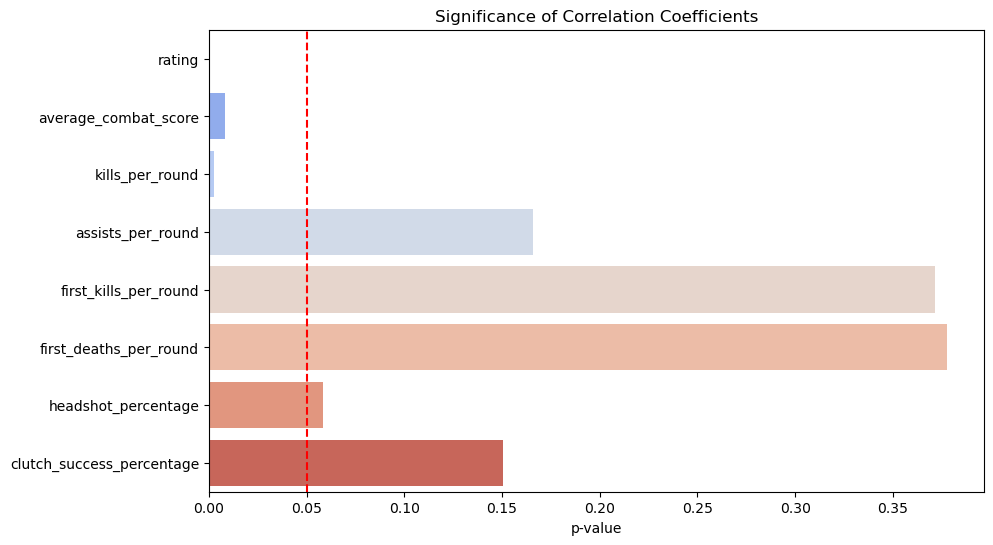

In [36]:
# visualize p values -- marking all p-values below 0.05 as significant
plt.figure(figsize=(10, 6))
sns.barplot(x='p-value', y=correlation_stats_df.index, data=correlation_stats_df, palette='coolwarm')
plt.axvline(x=0.05, color='red', linestyle='--')
plt.title('Significance of Correlation Coefficients')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# p value of less than 0.05
significant_metrics = ['rating', 'average_combat_score', 'kills_per_round', 'headshot_percentage']  # headshot % is close enough

X = full_merged_df[significant_metrics].dropna()
y = full_merged_df.loc[X.index, 'outcome_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(accuracy, class_report)

(0.5735294117647058,
 '              precision    recall  f1-score   support\n\n           0       0.45      0.37      0.41        27\n           1       0.63      0.71      0.67        41\n\n    accuracy                           0.57        68\n   macro avg       0.54      0.54      0.54        68\nweighted avg       0.56      0.57      0.56        68\n')

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

simplified_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 20, 50, 100],
    'min_samples_split': [5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=simplified_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Model Parameters:", best_rf_model)
print("Accuracy:", accuracy)
print("Classification Report:\\n", class_report)

basic_rf_model = RandomForestClassifier(random_state=42)
basic_rf_model.fit(X_train, y_train)
y_pred_basic = basic_rf_model.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)
class_report_basic = classification_report(y_test, y_pred_basic)

print("Basic Model Accuracy:", accuracy_basic)
print("Basic Model Classification Report:\\n", class_report_basic)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best Model Parameters: RandomForestClassifier(min_samples_leaf=5, min_samples_split=50,
                       n_estimators=50, random_state=42)
Accuracy: 0.47058823529411764
Classification Report:\n               precision    recall  f1-score   support

           0       0.39      0.59      0.47        27
           1       0.59      0.39      0.47        41

    accuracy                           0.47        68
   macro avg       0.49      0.49      0.47        68
weighted avg       0.51      0.47      0.47        68

Basic Model Accuracy: 0.4117647058823529
Basic Model Classification Report:\n               precision    recall  f1-score   support

           0       0.32      0.44      0.38        27
           1       0.52      0.39      0.44        41

    accuracy                           0.41        68
   macro avg       0.42      0.42      0.41        68
weighted avg       0.44      0.41      0.42        68



## Odds of one team winning

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X = full_merged_df[significant_metrics].dropna()
y = full_merged_df.loc[X.index, 'outcome_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# prevent overfitting
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # determining win or loss
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=1, batch_size=64)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/500
4/4 [==============================] - 2s 123ms/step - loss: 10.6741 - accuracy: 0.4885 - val_loss: 6.8349 - val_accuracy: 0.5273
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 8.2259 - accuracy: 0.5392 - val_loss: 9.8970 - val_accuracy: 0.5273
Epoch 3/500
4/4 [==============================] - 0s 16ms/step - loss: 6.4247 - accuracy: 0.4977 - val_loss: 8.9353 - val_accuracy: 0.5273
Epoch 4/500
4/4 [==============================] - 0s 15ms/step - loss: 7.0173 - accuracy: 0.5023 - val_loss: 5.9585 - val_accuracy: 0.5273
Epoch 5/500
4/4 [==============================] - 0s 15ms/step - loss: 5.0921 - accuracy: 0.5622 - val_loss: 3.3925 - val_accuracy: 0.5273
Epoch 6/500
4/4 [==============================] - 0s 16ms/step - loss: 4.6958 - accuracy: 0.4931 - val_loss: 2.1887 - val_accuracy: 0.5273
Epoch 7/500
4/4 [==============================] - 0s 17ms/step - loss: 4.3313 - accuracy: 0.4839 - val_loss: 2.1206 - val_accuracy: 0.5273
Epoch 8/500
4/4 [=

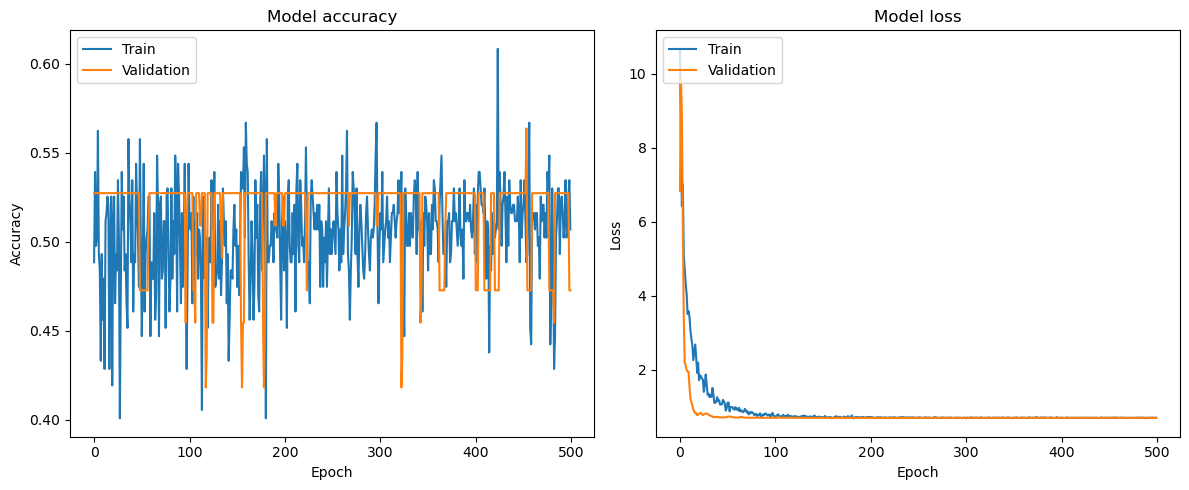

In [14]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [15]:
model.save('../data/models/model.h5')

## Individual performance

In [17]:
player_stats = players_df.groupby('player_name').agg({
    'rating': 'mean',
    'average_combat_score': 'mean',
    'kills_per_round': 'mean',
    'headshot_percentage': 'mean',
    'team_name': 'first'
}).reset_index()
player_stats

,player_name,rating,average_combat_score,kills_per_round,headshot_percentage,team_name
0,55EE,0.95,226.8,0.82,0.32,PEI WAN E-SPORTS
1,6sonya,0.98,178.9,0.63,0.23,Odd 1 OUT
2,7ssk7,1.08,181.7,0.66,0.30,NASR Esports
3,A1mly,0.97,213.5,0.75,0.34,Underground Gaming
4,AAAAY,0.74,194.1,0.71,0.31,FunPlus Phoenix
...,...,...,...,...,...,...
892,zero cap,0.81,149.4,0.50,0.28,Mochi Fanclub
893,zerona,1.05,239.4,0.87,0.33,Fisher Falcons
894,zery,1.06,225.9,0.78,0.28,Predator Xperion NXT
895,zolters,0.83,173.6,0.61,0.20,ONLINERS


c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

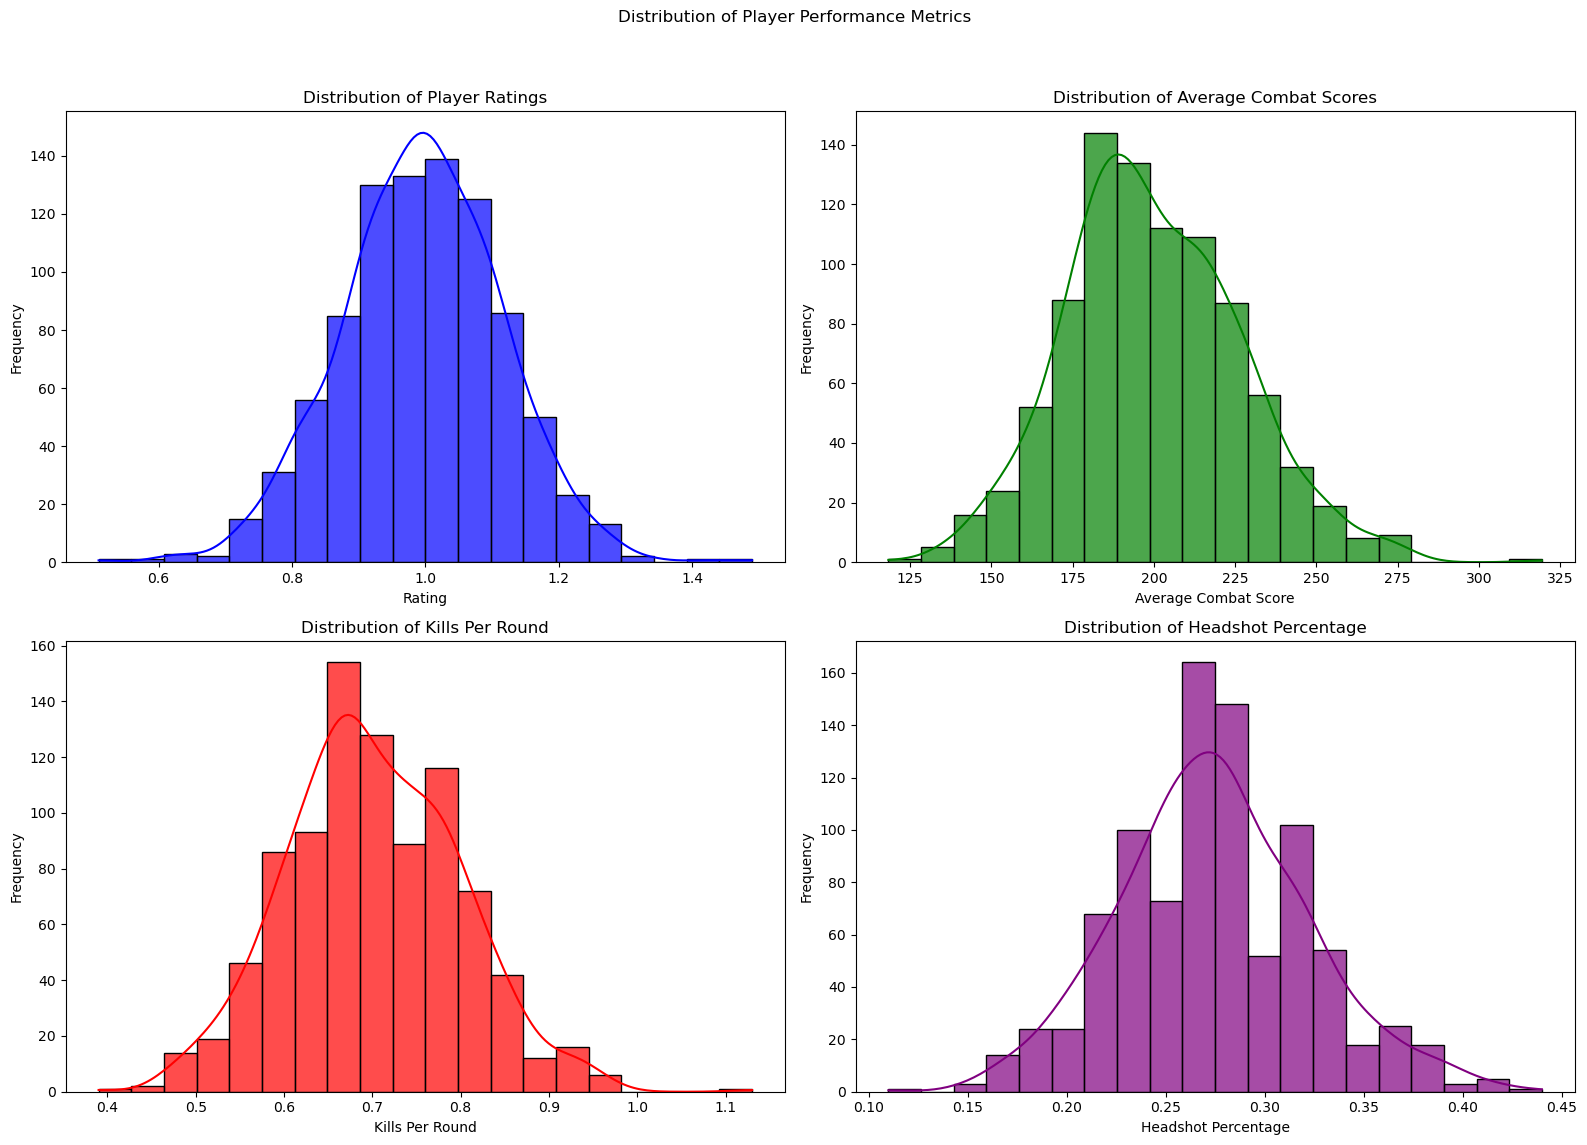

c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


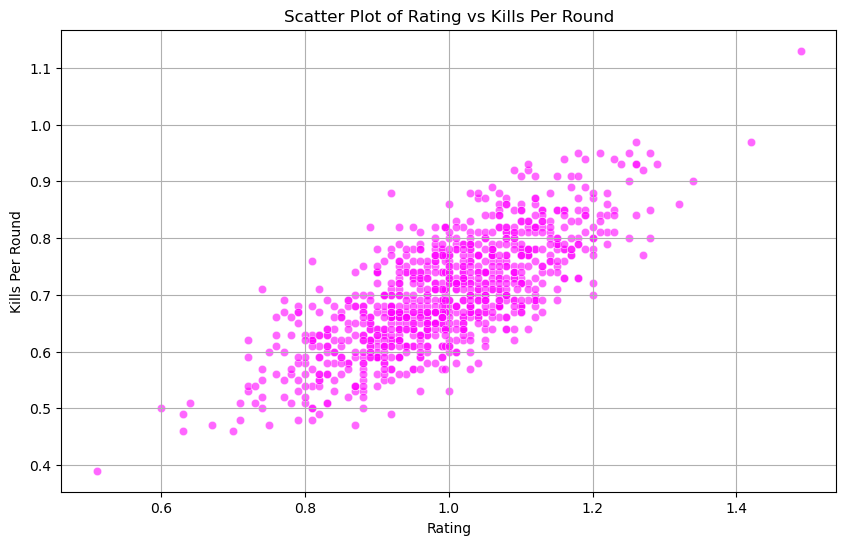

c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


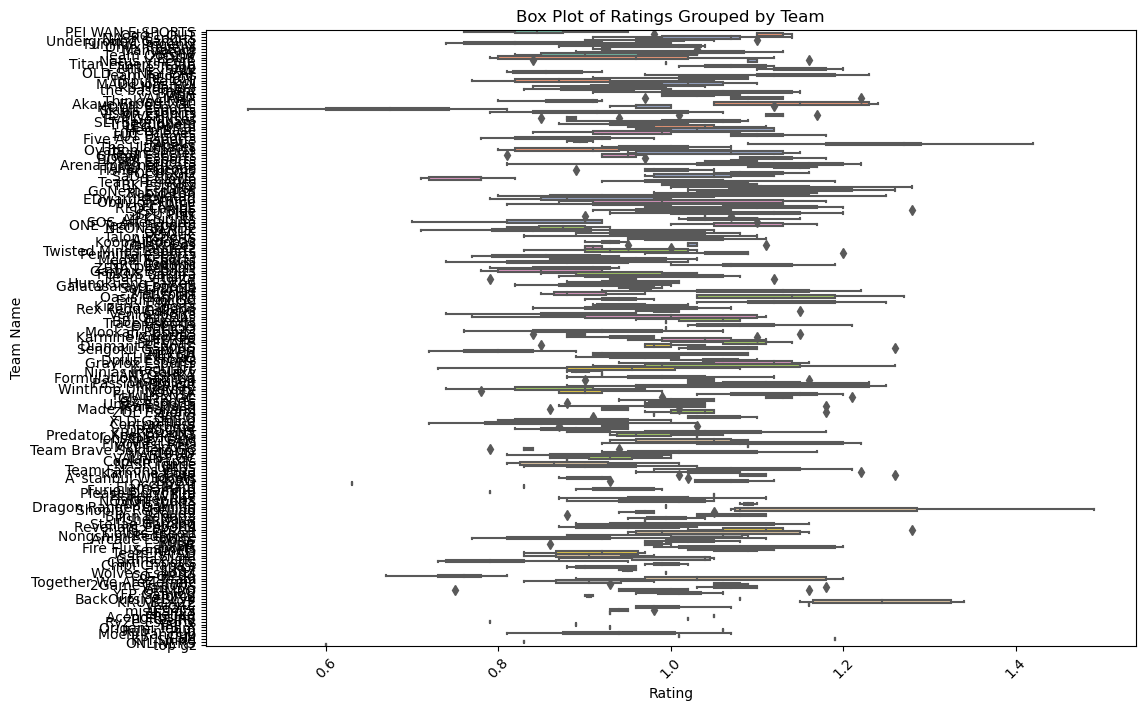

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Player Performance Metrics')

# histograms for each metric
sns.histplot(player_stats['rating'], bins=20, kde=True, ax=axes[0, 0], color='blue', alpha=0.7)
axes[0, 0].set_title('Distribution of Player Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(player_stats['average_combat_score'], bins=20, kde=True, ax=axes[0, 1], color='green', alpha=0.7)
axes[0, 1].set_title('Distribution of Average Combat Scores')
axes[0, 1].set_xlabel('Average Combat Score')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(player_stats['kills_per_round'], bins=20, kde=True, ax=axes[1, 0], color='red', alpha=0.7)
axes[1, 0].set_title('Distribution of Kills Per Round')
axes[1, 0].set_xlabel('Kills Per Round')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(player_stats['headshot_percentage'], bins=20, kde=True, ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_title('Distribution of Headshot Percentage')
axes[1, 1].set_xlabel('Headshot Percentage')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # make it fit
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='kills_per_round', data=player_stats, color='magenta', alpha=0.6)
plt.title('Scatter Plot of Rating vs Kills Per Round')
plt.xlabel('Rating')
plt.ylabel('Kills Per Round')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='team_name', data=player_stats, palette='Set2')
plt.title('Box Plot of Ratings Grouped by Team')
plt.xlabel('Rating')
plt.ylabel('Team Name')
plt.xticks(rotation=45)
plt.show()

c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


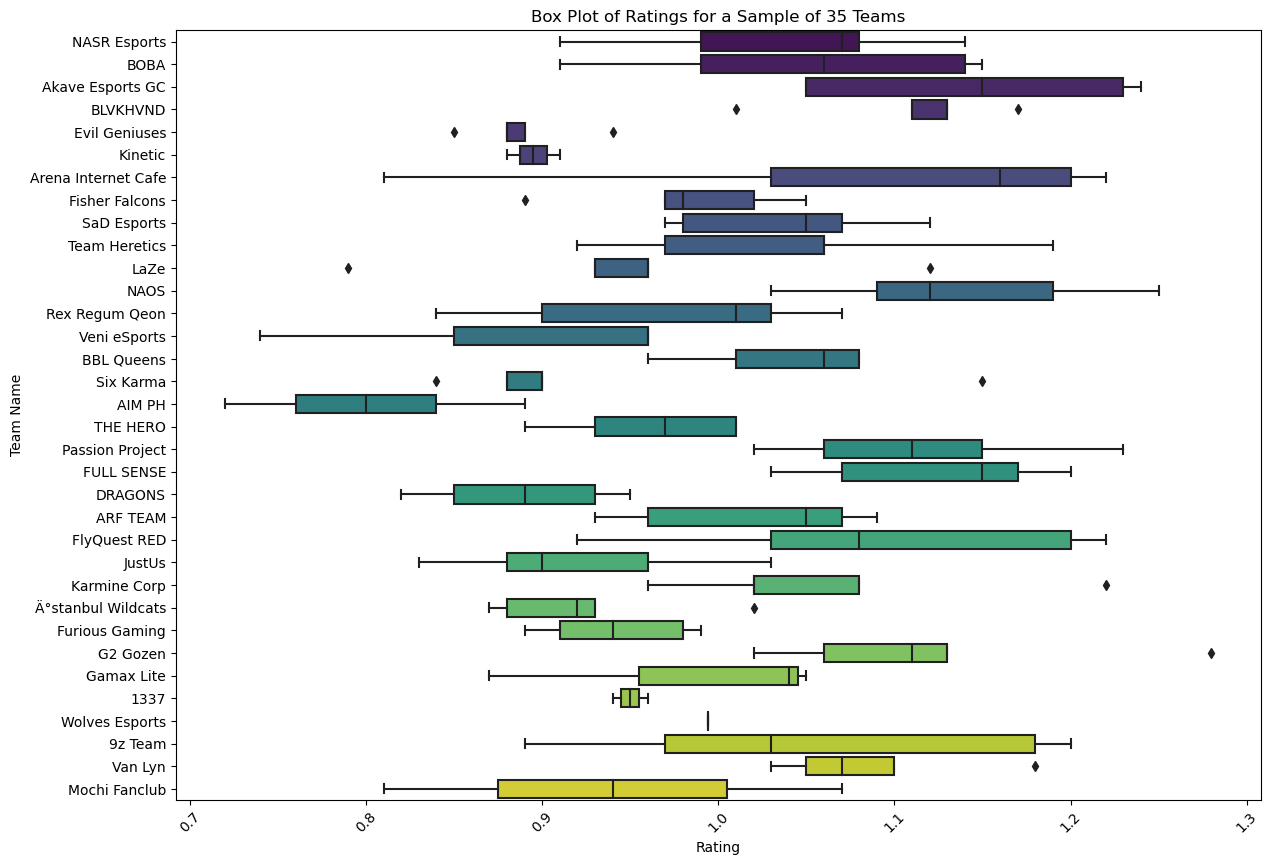

In [20]:
# too cluttered, sample 35 teams
sampled_teams = player_stats['team_name'].dropna().sample(n=35, random_state=42).unique()

sampled_player_stats = player_stats[player_stats['team_name'].isin(sampled_teams)]

plt.figure(figsize=(14, 10))
sns.boxplot(x='rating', y='team_name', data=sampled_player_stats, palette='viridis')
plt.title('Box Plot of Ratings for a Sample of 35 Teams')
plt.xlabel('Rating')
plt.ylabel('Team Name')
plt.xticks(rotation=45)
plt.show()

c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


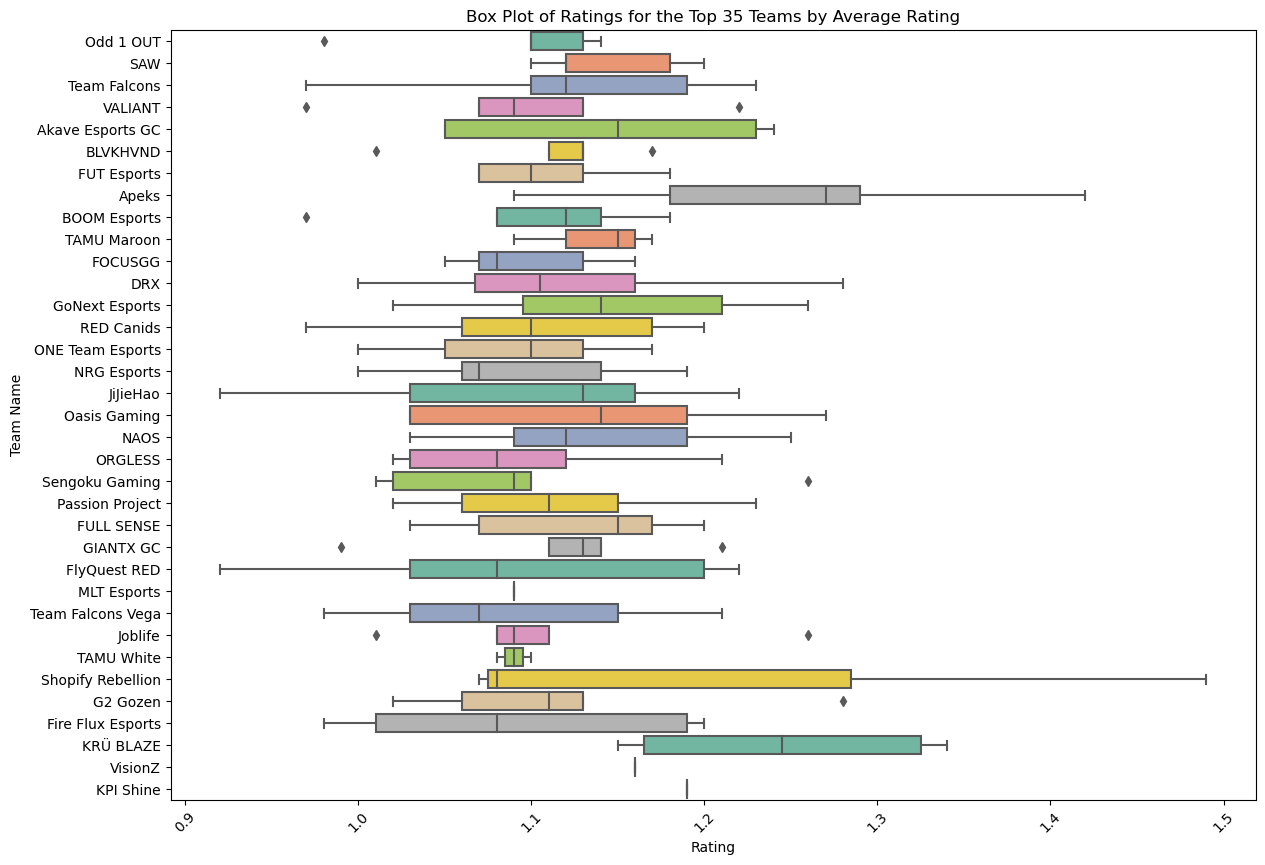

In [21]:
# top 35 teams
top_teams = player_stats.groupby('team_name')['rating'].mean().nlargest(35).index
top_teams_stats = player_stats[player_stats['team_name'].isin(top_teams)]

# Create a box plot of ratings grouped by top teams
plt.figure(figsize=(14, 10))
sns.boxplot(x='rating', y='team_name', data=top_teams_stats, palette='Set2')
plt.title('Box Plot of Ratings for the Top 35 Teams by Average Rating')
plt.xlabel('Rating')
plt.ylabel('Team Name')
plt.xticks(rotation=45)
plt.show()

c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\colin\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


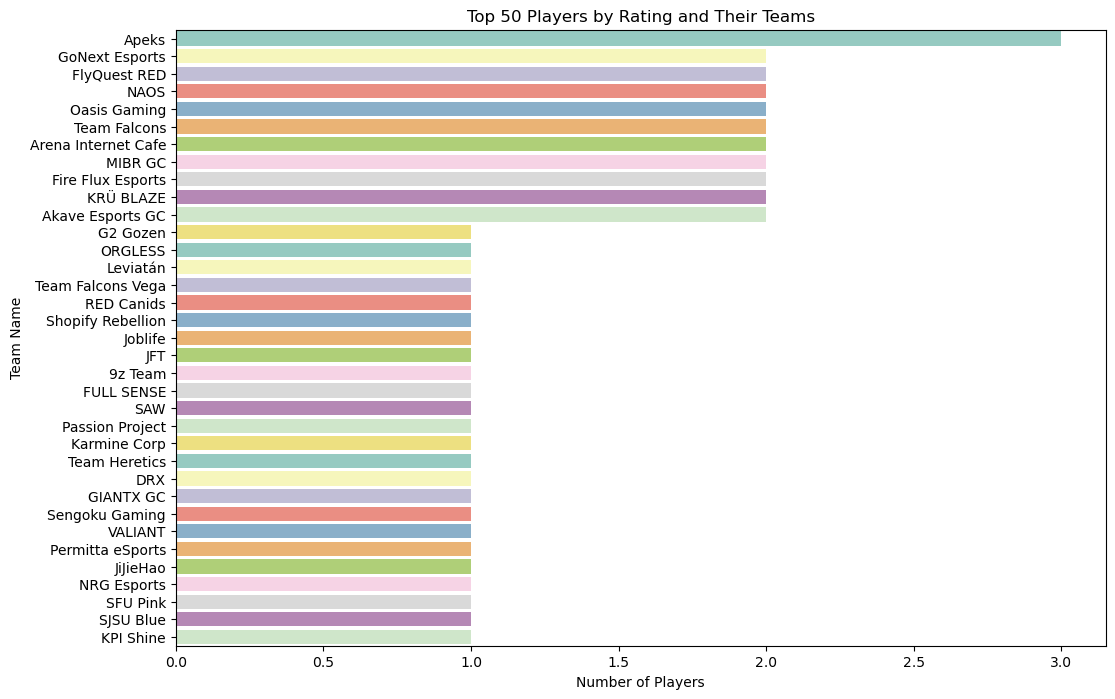

In [33]:
player_stats['rating_rank'] = player_stats['rating'].rank(method='max', ascending=False)
top_players = player_stats[player_stats['rating_rank'] <= 50]
top_players['team_name'].value_counts()

# plot top players and their teams
plt.figure(figsize=(12, 8))
sns.countplot(y='team_name', data=top_players, palette='Set3', order=top_players['team_name'].value_counts().index)
plt.title('Top 50 Players by Rating and Their Teams')
plt.xlabel('Number of Players')
plt.ylabel('Team Name')
plt.show()